In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Lenovo\Documents\Verzeo\Major_Project\Dataset\Restaurant_Reviews.tsv", sep='\t')

In [4]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [11]:
df.loc[df['Liked']== 1,'Liked' ]="Positive"

ValueError: ('Lengths must match to compare', (1000,), (2,))

In [10]:
df.head()

,Review,Liked
0,Wow... Loved this place.,Positive
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,Positive
4,The selection on the menu was great and so wer...,Positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
df['Liked'].unique()

array([1, 0], dtype=int64)

In [6]:
df['Liked'].nunique()

2

<AxesSubplot:>

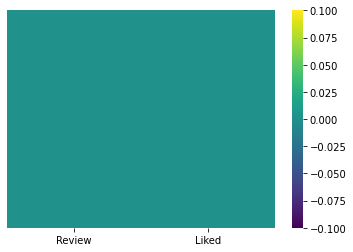

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

EDA- Exploratory Data Analysis

<AxesSubplot:>

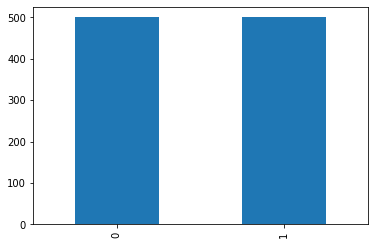

In [8]:
df['Liked'].value_counts().plot(kind='bar')

In [23]:
review = df['Review']

In [9]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

Preprocessing

In [24]:
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

In [25]:
Review = review.apply(lambda x: remove_punctuation(x))
Review.head()

0                                    wowlovedthisplace
1                                       crustisnotgood
2                     nottastyandthetexturewajustnasty
3    stoppedbyduringthelatemaybankholidayoffrickste...
4        theselectiononthemenuwagreatandsoweretheprice
Name: Review, dtype: object

In [31]:
tokenizer = RegexpTokenizer(r'\w+')
Review = review.apply(lambda x: tokenizer.tokenize(x))
Review.head()

TypeError: expected string or bytes-like object

In [34]:
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

In [35]:
Review = review.apply(lambda x: word_lemmatizer(x))

In [37]:
Review.head()

0                            [wow, loved, this, place]
1                               [crust, is, not, good]
2     [not, tasty, and, the, texture, wa, just, nasty]
3    [stopped, by, during, the, late, may, bank, ho...
4    [the, selection, on, the, menu, wa, great, and...
Name: Review, dtype: object

In [18]:
df['Review'].dtype

dtype('O')

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df['Review']
y = df['Liked']

dtype('O')

In [68]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [69]:
x_train.shape

(700,)

In [70]:
y_train.shape

(700,)

In [71]:
x_test.shape

(300,)

In [72]:
y_test.shape

(300,)

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

In [74]:
vect     = count_vectorizer.fit_transform(x_train).toarray()
vec_test = count_vectorizer.transform(x_test).toarray()

AttributeError: 'list' object has no attribute 'lower'

In [45]:
vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
from sklearn.svm import SVC
model1 = SVC()

In [39]:
model1.fit(vect,y_train)

SVC()

In [43]:
y_pred1 = model1.predict(vec_test)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))  
print(accuracy_score(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       162
           1       0.73      0.79      0.76       138

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300

[[121  41]
 [ 29 109]]
0.7666666666666667


In [51]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps =[('countvectorizer', CountVectorizer()),
                                ('Model', SVC())])

In [52]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('Model', SVC())])

In [53]:
pred2 = pipeline.predict(x_test)

In [54]:
print(accuracy_score(pred2,y_test))

0.7833333333333333
